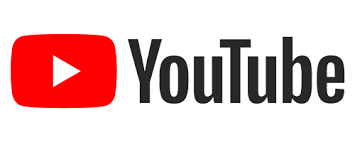
# Data Mining with Youtube API Requests

### by Kevin Halim

[github](https://github.com/avnore)

disclaimer:

This code is not the best at requesting youtube api, so i'm open for any feedback or even critics for my code

## Import Library

here we will import the library that we will be using to data mine Youtube API and making it to dataframe.

In [1]:
import pandas as pd
import requests
import json

## Inputting API Key, and Channel ID

the code down below are for your api_key and the channel_id that you want to get the video.

How to get Youtube Api Key:
https://developers.google.com/youtube/v3/getting-started

One way of how to get youtube channel id:
https://commentpicker.com/youtube-channel-id.php

In [2]:
api_key = ''
channel_id = 'UCoIiiHof6BJ85PLuLkuxuhw'

## Function to request Youtube API

In [3]:
def get_channel_stats(api_key, channel_id):    
    url_channel_stats = url = 'https://www.googleapis.com/youtube/v3/channels?key='+api_key+'&id='+channel_id+'&part=snippet,contentDetails,statistics'
    response_channel_stats = requests.get(url_channel_stats).json()

    all_data = []

    for i in range(len(response_channel_stats['items'])):
        data = dict(Channel_name = response_channel_stats['items'][i]['snippet']['title'],
                    Subscribers = response_channel_stats['items'][i]['statistics']['subscriberCount'],
                    Views = response_channel_stats['items'][i]['statistics']['viewCount'],
                    Total_videos = response_channel_stats['items'][i]['statistics']['videoCount'],
                    playlist_id = response_channel_stats['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)

    channel_data = pd.DataFrame(all_data)
    
    return channel_data

In [4]:
def get_video_id(api_key, playlist_id):
    url_video_id = 'https://www.googleapis.com/youtube/v3/playlistItems?key='+api_key+'&playlistId='+playlist_id+'&part=contentDetails&order=date&maxResults=50'
    response_video_id = requests.get(url_video_id).json()
    response_video_id

    video_ids = []

    for i in range(len(response_video_id['items'])):
        video_ids.append(response_video_id['items'][i]['contentDetails']['videoId'])

    next_page_token = response_video_id.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            url_video_id = 'https://www.googleapis.com/youtube/v3/playlistItems?key='+api_key+'&playlistId='+playlist_id+'&part=contentDetails&order=date&maxResults=50&pageToken='+next_page_token
            response_video_id = requests.get(url_video_id).json()

            for i in range(len(response_video_id['items'])):
                video_ids.append(response_video_id['items'][i]['contentDetails']['videoId'])

            next_page_token = response_video_id.get('nextPageToken')
    
    return video_ids

In [5]:
def get_video_stats(api_key, video_ids):
    all_video_stats = []

    for i in range(0, len(video_ids)):
        url_video_stats = 'https://www.googleapis.com/youtube/v3/videos?part=snippet,statistics,contentDetails&id='+video_ids[i]+'&key='+api_key
        response_video_stats = requests.get(url_video_stats).json()

        try:       
            video_stats = dict(Title = response_video_stats['items'][0]['snippet']['title'],
                                Published_date = response_video_stats['items'][0]['snippet']['publishedAt'],
                                Views = response_video_stats['items'][0]['statistics']['viewCount'],
                                Likes = response_video_stats['items'][0]['statistics']['likeCount'],
                                Duration = response_video_stats['items'][0]['contentDetails']['duration'],
                                Tags = ",".join(response_video_stats['items'][0]['snippet']['tags']),
                                video_id = video_ids[i]
                                )
        except:
            continue
            # We don't want videos without tag so we just skipped it, 
            # if you want the video without tag you can delete the continue and the string block below
            """try:
                video_stats = dict(Title = response_video_stats['items'][0]['snippet']['title'],
                                    Published_date = response_video_stats['items'][0]['snippet']['publishedAt'],
                                    Views = response_video_stats['items'][0]['statistics']['viewCount'],
                                    Likes = response_video_stats['items'][0]['statistics']['likeCount'],
                                    Duration = response_video_stats['items'][0]['contentDetails']['duration'],
                                    video_id = video_ids[i]
                                    )
            except:
                continue"""

        all_video_stats.append(video_stats)

    video_data = pd.DataFrame(all_video_stats)
    
    return video_data

## The call

In [6]:
channel_data = get_channel_stats(api_key, channel_id)
playlist_id = channel_data.playlist_id[0]
video_ids = get_video_id(api_key, playlist_id)
video = get_video_stats(api_key, video_ids)

## Save it as .xlsx

In [7]:
video.to_excel("video_stats.xlsx")